In [1]:
#dependencies
import random
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import json
import pprint
from citipy import citipy

In [2]:
#api keys
from config import WKey
from config import GKey

#style settings for plots
plt.style.use("seaborn")

In [3]:
#Generate random latitudes and longitudes
lat = np.random.uniform(low=-90, high=90, size=2000)
lng = np.random.uniform(low=-180, high=180, size=2000)

#Creating coordinate pairs
coordinates = []
for x in range(0,len(lat)):
    coordinates.append((lat[x], lng[x]))

In [4]:
#Finding the cities nearest to the coordinates
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))

In [5]:
#Creating DataFrame
cities_df = pd.DataFrame(cities)
cities_df["City Name"] = ""
cities_df["Country Code"] = ""

for index, row in cities_df.iterrows():
    row["City Name"] = cities_df.iloc[index,0].city_name
    row["Country Code"] = cities_df.iloc[index,0].country_code
    
cities_df.head()

,0,City Name,Country Code
0,<citipy.citipy.City object at 0x000001ECFED759B0>,villarrica,cl
1,<citipy.citipy.City object at 0x000001ECFEA8D518>,albany,au
2,<citipy.citipy.City object at 0x000001EC8098A240>,kruisfontein,za
3,<citipy.citipy.City object at 0x000001ECFEA9F240>,portland,au
4,<citipy.citipy.City object at 0x000001ECFF21D1D0>,upernavik,gl


In [6]:
#Dropping duplicate cities
cities_df.drop_duplicates(['City Name', 'Country Code'], inplace=True)
cities_df.reset_index(inplace=True)
cities_df.head()


,index,0,City Name,Country Code
0,0,<citipy.citipy.City object at 0x000001ECFED759B0>,villarrica,cl
1,1,<citipy.citipy.City object at 0x000001ECFEA8D518>,albany,au
2,2,<citipy.citipy.City object at 0x000001EC8098A240>,kruisfontein,za
3,3,<citipy.citipy.City object at 0x000001ECFEA9F240>,portland,au
4,4,<citipy.citipy.City object at 0x000001ECFF21D1D0>,upernavik,gl


In [7]:
# Deleting unnecessary columns
del cities_df[0]
del cities_df['index']

cities_df.head()

,City Name,Country Code
0,villarrica,cl
1,albany,au
2,kruisfontein,za
3,portland,au
4,upernavik,gl


In [8]:
# Adding columns for values
cities_df['Latitude'] = ""
cities_df['Longitude'] = ""
cities_df['Temperature (F)'] = ""
cities_df['Humidity (%)'] = ""
cities_df['Cloudiness (%)'] = ""
cities_df['Wind Speed (mph)'] = ""

cities_df.head()

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,villarrica,cl,,,,,,
1,albany,au,,,,,,
2,kruisfontein,za,,,,,,
3,portland,au,,,,,,
4,upernavik,gl,,,,,,


In [9]:
# Accessing data
print("Beginning Data Retrieval")
print("---------------------------------")

for index, row in cities_df.iterrows():
    # Building target url
    url = "http://api.openweathermap.org/data/2.5/weather?q=%s,%s&units=imperial&appid=%s" % (row['City Name'], row['Country Code'], WKey)
   
    # Printing to ensure loop is correct
    print("Now retrieving City #" + str(index) + ": " + row['City Name'] + ", " + row['Country Code'])
    print(url)
    
    # Running request
    weather_data = requests.get(url).json()
    
    try:
        # Appending latitude and longitude to correct location
        row['Latitude'] = weather_data['coord']['lat']
        row['Longitude'] = weather_data['coord']['lon']
    
        # Appending temperature to correct location
        row['Temperature (F)'] = weather_data['main']['temp']
    
        # Appending humidity to correct location
        row['Humidity (%)'] = weather_data['main']['humidity']
    
        # Appending cloudiness to correct location
        row['Cloudiness (%)'] = weather_data['clouds']['all']
    
        # Appending wind speed to correct location
        row['Wind Speed (mph)'] = weather_data['wind']['speed']
    except:
        print("Error with city data. Skipping")
        continue

print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")



Beginning Data Retrieval
---------------------------------
Now retrieving City #0: villarrica, cl
http://api.openweathermap.org/data/2.5/weather?q=villarrica,cl&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #1: albany, au
http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #2: kruisfontein, za
http://api.openweathermap.org/data/2.5/weather?q=kruisfontein,za&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #3: portland, au
http://api.openweathermap.org/data/2.5/weather?q=portland,au&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #4: upernavik, gl
http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #5: arraial do cabo, br
http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo,br&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now r

Now retrieving City #52: kaitangata, nz
http://api.openweathermap.org/data/2.5/weather?q=kaitangata,nz&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #53: rikitea, pf
http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #54: sal rei, cv
http://api.openweathermap.org/data/2.5/weather?q=sal rei,cv&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #55: esperance, au
http://api.openweathermap.org/data/2.5/weather?q=esperance,au&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #56: figeac, fr
http://api.openweathermap.org/data/2.5/weather?q=figeac,fr&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #57: kirakira, sb
http://api.openweathermap.org/data/2.5/weather?q=kirakira,sb&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #58: grand river south east, mu
http://api.openweathermap.org/da

Now retrieving City #105: cape town, za
http://api.openweathermap.org/data/2.5/weather?q=cape town,za&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #106: belushya guba, ru
http://api.openweathermap.org/data/2.5/weather?q=belushya guba,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Error with city data. Skipping
Now retrieving City #107: edd, er
http://api.openweathermap.org/data/2.5/weather?q=edd,er&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #108: port shepstone, za
http://api.openweathermap.org/data/2.5/weather?q=port shepstone,za&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #109: cascais, pt
http://api.openweathermap.org/data/2.5/weather?q=cascais,pt&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #110: biak, id
http://api.openweathermap.org/data/2.5/weather?q=biak,id&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #111: nishihara, jp
h

Now retrieving City #157: bonavista, ca
http://api.openweathermap.org/data/2.5/weather?q=bonavista,ca&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #158: tifton, us
http://api.openweathermap.org/data/2.5/weather?q=tifton,us&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #159: indramayu, id
http://api.openweathermap.org/data/2.5/weather?q=indramayu,id&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #160: half moon bay, us
http://api.openweathermap.org/data/2.5/weather?q=half moon bay,us&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #161: henties bay, na
http://api.openweathermap.org/data/2.5/weather?q=henties bay,na&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #162: naze, jp
http://api.openweathermap.org/data/2.5/weather?q=naze,jp&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #163: saint-augustin, ca
http://api.openweatherm

Error with city data. Skipping
Now retrieving City #210: puerto colombia, co
http://api.openweathermap.org/data/2.5/weather?q=puerto colombia,co&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #211: nantucket, us
http://api.openweathermap.org/data/2.5/weather?q=nantucket,us&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #212: louisbourg, ca
http://api.openweathermap.org/data/2.5/weather?q=louisbourg,ca&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Error with city data. Skipping
Now retrieving City #213: loralai, pk
http://api.openweathermap.org/data/2.5/weather?q=loralai,pk&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #214: kuito, ao
http://api.openweathermap.org/data/2.5/weather?q=kuito,ao&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #215: beloha, mg
http://api.openweathermap.org/data/2.5/weather?q=beloha,mg&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now re

Now retrieving City #263: aswan, eg
http://api.openweathermap.org/data/2.5/weather?q=aswan,eg&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #264: muravlenko, ru
http://api.openweathermap.org/data/2.5/weather?q=muravlenko,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #265: nawa, in
http://api.openweathermap.org/data/2.5/weather?q=nawa,in&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #266: cumberland, us
http://api.openweathermap.org/data/2.5/weather?q=cumberland,us&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #267: port elizabeth, za
http://api.openweathermap.org/data/2.5/weather?q=port elizabeth,za&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #268: avera, pf
http://api.openweathermap.org/data/2.5/weather?q=avera,pf&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Error with city data. Skipping
Now retrieving City #269: eyl, so
http://api.

Now retrieving City #315: mercedes, ar
http://api.openweathermap.org/data/2.5/weather?q=mercedes,ar&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #316: kavieng, pg
http://api.openweathermap.org/data/2.5/weather?q=kavieng,pg&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #317: keetmanshoop, na
http://api.openweathermap.org/data/2.5/weather?q=keetmanshoop,na&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #318: kuusamo, fi
http://api.openweathermap.org/data/2.5/weather?q=kuusamo,fi&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #319: caravelas, br
http://api.openweathermap.org/data/2.5/weather?q=caravelas,br&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #320: kieta, pg
http://api.openweathermap.org/data/2.5/weather?q=kieta,pg&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #321: nouakchott, mr
http://api.openweathermap.org/data/

Now retrieving City #368: pimenteiras, br
http://api.openweathermap.org/data/2.5/weather?q=pimenteiras,br&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #369: longkou, cn
http://api.openweathermap.org/data/2.5/weather?q=longkou,cn&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #370: suamico, us
http://api.openweathermap.org/data/2.5/weather?q=suamico,us&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #371: lavrentiya, ru
http://api.openweathermap.org/data/2.5/weather?q=lavrentiya,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #372: san fernando, mx
http://api.openweathermap.org/data/2.5/weather?q=san fernando,mx&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #373: freeport, us
http://api.openweathermap.org/data/2.5/weather?q=freeport,us&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #374: pedasi, pa
http://api.openweathermap

Now retrieving City #420: hobyo, so
http://api.openweathermap.org/data/2.5/weather?q=hobyo,so&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #421: krivopolyanye, ru
http://api.openweathermap.org/data/2.5/weather?q=krivopolyanye,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Error with city data. Skipping
Now retrieving City #422: margate, za
http://api.openweathermap.org/data/2.5/weather?q=margate,za&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #423: orcopampa, pe
http://api.openweathermap.org/data/2.5/weather?q=orcopampa,pe&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #424: ruian, cn
http://api.openweathermap.org/data/2.5/weather?q=ruian,cn&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Error with city data. Skipping
Now retrieving City #425: duz, tn
http://api.openweathermap.org/data/2.5/weather?q=duz,tn&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Error with city data. Skip

Now retrieving City #473: monrovia, lr
http://api.openweathermap.org/data/2.5/weather?q=monrovia,lr&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #474: urulga, ru
http://api.openweathermap.org/data/2.5/weather?q=urulga,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Error with city data. Skipping
Now retrieving City #475: makakilo city, us
http://api.openweathermap.org/data/2.5/weather?q=makakilo city,us&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #476: zhangye, cn
http://api.openweathermap.org/data/2.5/weather?q=zhangye,cn&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #477: roald, no
http://api.openweathermap.org/data/2.5/weather?q=roald,no&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #478: calintaan, ph
http://api.openweathermap.org/data/2.5/weather?q=calintaan,ph&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #479: leua, ao
http://api

Error with city data. Skipping
Now retrieving City #527: saint-paul, re
http://api.openweathermap.org/data/2.5/weather?q=saint-paul,re&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #528: ugoofaaru, mv
http://api.openweathermap.org/data/2.5/weather?q=ugoofaaru,mv&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #529: joshimath, in
http://api.openweathermap.org/data/2.5/weather?q=joshimath,in&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #530: cananea, mx
http://api.openweathermap.org/data/2.5/weather?q=cananea,mx&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #531: skjervoy, no
http://api.openweathermap.org/data/2.5/weather?q=skjervoy,no&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #532: pedernales, do
http://api.openweathermap.org/data/2.5/weather?q=pedernales,do&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #533: geraldton

Now retrieving City #579: salalah, om
http://api.openweathermap.org/data/2.5/weather?q=salalah,om&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #580: nyuksenitsa, ru
http://api.openweathermap.org/data/2.5/weather?q=nyuksenitsa,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #581: balkhash, kz
http://api.openweathermap.org/data/2.5/weather?q=balkhash,kz&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #582: catalina foothills, us
http://api.openweathermap.org/data/2.5/weather?q=catalina foothills,us&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #583: grand centre, ca
http://api.openweathermap.org/data/2.5/weather?q=grand centre,ca&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Error with city data. Skipping
Now retrieving City #584: oyama, jp
http://api.openweathermap.org/data/2.5/weather?q=oyama,jp&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City

Now retrieving City #631: vostok, ru
http://api.openweathermap.org/data/2.5/weather?q=vostok,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #632: lubango, ao
http://api.openweathermap.org/data/2.5/weather?q=lubango,ao&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #633: tirumullaivasal, in
http://api.openweathermap.org/data/2.5/weather?q=tirumullaivasal,in&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #634: chokwe, mz
http://api.openweathermap.org/data/2.5/weather?q=chokwe,mz&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #635: mount gambier, au
http://api.openweathermap.org/data/2.5/weather?q=mount gambier,au&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #636: inhambane, mz
http://api.openweathermap.org/data/2.5/weather?q=inhambane,mz&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #637: ukiah, us
http://api.openweatherma

Now retrieving City #683: razole, in
http://api.openweathermap.org/data/2.5/weather?q=razole,in&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #684: weligama, lk
http://api.openweathermap.org/data/2.5/weather?q=weligama,lk&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #685: imphal, in
http://api.openweathermap.org/data/2.5/weather?q=imphal,in&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #686: roches noires, mu
http://api.openweathermap.org/data/2.5/weather?q=roches noires,mu&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Error with city data. Skipping
Now retrieving City #687: vanimo, pg
http://api.openweathermap.org/data/2.5/weather?q=vanimo,pg&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #688: paramonga, pe
http://api.openweathermap.org/data/2.5/weather?q=paramonga,pe&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #689: sabratah, ly
http:/

In [10]:
# Changing strings to floats
columns = ['Latitude', 'Temperature (F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']
for column in columns:
    cities_df[column] = pd.to_numeric(cities_df[column], errors='coerce')
    
# Dropping NaN values
cities_df.dropna(inplace=True)

cities_df = cities_df.head(500)
cities_df.describe

<bound method NDFrame.describe of              City Name Country Code  Latitude Longitude  Temperature (F)  \
0           villarrica           cl    -39.28    -72.23            40.76   
1               albany           au    -35.02    117.88            50.03   
2         kruisfontein           za    -34.00     24.73            66.32   
3             portland           au    -33.35    149.98            29.78   
4            upernavik           gl     72.79    -56.15            33.74   
5      arraial do cabo           br    -22.97    -42.02            78.30   
6                vaini           to    -21.20    -175.2            69.80   
7            jamestown           sh    -15.94     -5.72            70.82   
8              talnakh           ru     69.49     88.39            54.80   
11             okhotsk           ru     59.36    143.24            45.17   
12           nandurbar           in     21.36     74.24            84.23   
13         belaya gora           ru     68.54    146.1

In [11]:
# Exporting DataFrame
cities_df.to_csv("weather_info.csv")

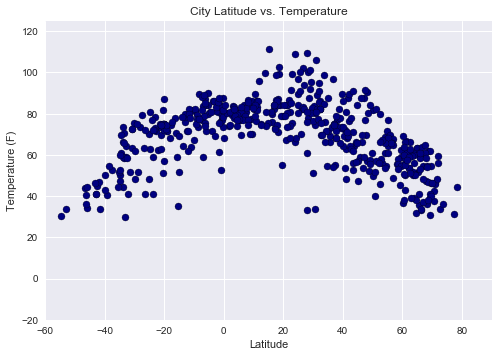

In [12]:
#Latitude vs Teperature Plot

# Axes values# Axes  
x_axis = cities_df['Latitude']
y_axis = cities_df['Temperature (F)']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black')

plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Temperature (F)")
plt.ylim(-20,125)

plt.savefig("LatitudeVsTemperature.png")
plt.show()

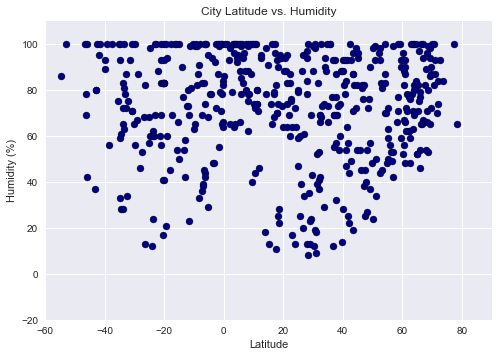

In [13]:
#Latitude vs Humidity

# Axes values# Axes  
x_axis = cities_df['Latitude']
y_axis = cities_df['Humidity (%)']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Humidity (%)")
plt.ylim(-20,110)

plt.savefig("LatitudeVsHumidity.png")
plt.show()

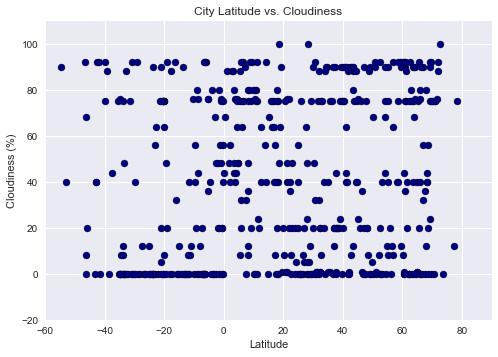

In [14]:
#Latitude vs Cloudiness
# Axes values
x_axis = cities_df['Latitude']
y_axis = cities_df['Cloudiness (%)']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Cloudiness (%)")
plt.ylim(-20,110)

plt.savefig("LatitudeVsCloudiness.png")
plt.show()

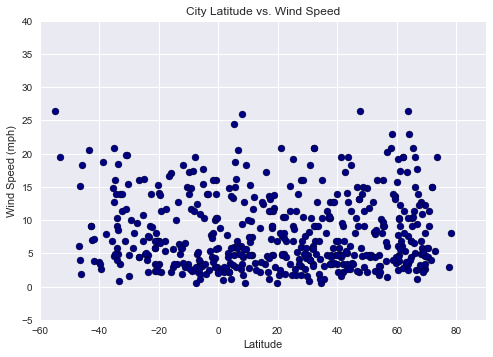

In [15]:
#Latitude vs Wind Speed
# Axes values
x_axis = cities_df['Latitude']
y_axis = cities_df['Wind Speed (mph)']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Wind Speed (mph)")
plt.ylim(-5,40)

plt.savefig("LatitudeVsWindSpeed.png")
plt.show()